# LSTMÏúºÎ°ú ÏùåÏïÖ ÏÉùÏÑ±Ìï¥Î≥¥Í∏∞

### YBIGTA 22Í∏∞ XXX

## 1. Introduction

LSTMÏùÄ stringÏùò seriesÍ∞Ä Îì§Ïñ¥ÏôîÏùÑ Îïå Îã§ÏùåÏóê ÎÇòÏò¨ stringÏùÑ ÏòàÏ∏°ÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï† Ïàò ÏûàÏäµÎãàÎã§.

MIDIÎùºÎäî ÌååÏùº Í∑úÍ≤©ÏùÑ ÌÜµÌï¥ Ïª¥Ìì®ÌÑ∞ÏóêÏÑú ÏùåÏïÖÏùÑ ÏûëÍ≥°ÌïòÍ≥† Ïû¨ÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. MIDI ÌååÏùºÏùÄ Î™ÖÎ†πÏñ¥Î•º ÌÜµÌï¥ 'ÌîºÏïÑÎÖ∏Î°ú ÎèÑÎ•º ÏπòÍ≥† ÎìúÎüºÏúºÎ°ú Î™á Î∞ïÏûêÎ•º ÏπòÎäî' Îì±Ïùò ÏïÖÎ≥¥Î•º Í∏∞Ïà†Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî string ÌòïÌÉúÏù¥ÎØÄÎ°ú LSTMÏùÑ Ï†ÅÏö©ÌïòÍ∏∞Ïóê Ï¢ãÏùÄ ÏòàÏ†úÍ∞Ä Îê©ÎãàÎã§.

ÌååÏù¥Ïç¨Ïùò music21 ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÎ©¥ MIDI Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.

[Ï∞∏Í≥†] <b>1/1 ÏàòÏöîÏùº 22:00Î∂ÄÌÑ∞ Íµ¨Í∏Ä ÎØ∏Ìä∏</b> Ïó¥Ïñ¥ÎÜìÏùÑÌÖåÎãà Í≥ºÏ†ú Í¥ÄÎ†® ÏßàÎ¨∏ ÏûàÏúºÏã† Î∂ÑÎì§ÏùÄ Îì§Ïñ¥Ïò§ÏÖîÎèÑ Îê©ÎãàÎã§.

Original code: https://www.kaggle.com/code/karnikakapoor/music-generation-lstm/data

## 2. GPU ÏÇ¨Ïö© ÏÑ§Ï†ï
Îü∞ÌÉÄÏûÑ -> Îü∞ÌÉÄÏûÑ Ïú†Ìòï Î≥ÄÍ≤Ω -> ÌïòÎìúÏõ®Ïñ¥ Í∞ÄÏÜçÍ∏∞ GPUÎ°ú Î∞òÎìúÏãú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî!

In [1]:
## GPU ÌôïÏù∏: GPU Ïù¥Î¶ÑÍ≥º GPU Î©îÎ™®Î¶¨ Ï†êÏú†Ïú® ÌôïÏù∏ÌïòÍ∏∞
!nvidia-smi -L
!nvidia-smi

GPU 0: Tesla T4 (UUID: GPU-0283a989-2baa-d246-4b77-c6748047331c)
Mon Jan 30 10:09:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                       

## 3. ÌòÑÏû¨ Îü∞ÌÉÄÏûÑÏóê Îç∞Ïù¥ÌÑ∞ ÏóÖÎ°úÎìú, ÏïïÏ∂ï ÌíÄÍ∏∞
Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóê ÎßàÏö¥Ìä∏ÌïòÎäî ÎåÄÏã† ÌòÑÏû¨ Îü∞ÌÉÄÏûÑÏóê Îç∞Ïù¥ÌÑ∞Î•º ÏóÖÎ°úÎìúÌï¥ÏÑú ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§. ÌååÏùºÏùÄ ÍµêÏú°ÏÑ∏ÏÖò ÎìúÎùºÏù¥Î∏åÏóê ÏóÖÎ°úÎìú ÎêòÏñ¥ÏûàÏúºÎãà Î°úÏª¨Î°ú Îã§Ïö¥Î∞õÏúºÏã† ÌõÑ ÏóÖÎ°úÎìúÌïòÏãúÎ©¥ Îê©ÎãàÎã§.
1. ÌååÏùº -> ÏÑ∏ÏÖò Ï†ÄÏû•ÏÜåÏùò ÏóÖÎ°úÎìú Î≤ÑÌäº ÌÅ¥Î¶≠ (Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏ Î≤ÑÌäº Í∏∞Ï§Ä ÏôºÏ™ΩÏóê ÏûàÏäµÎãàÎã§.)
2. chopin.zip ÌååÏùº ÏóÖÎ°úÎìú
3. ÏïÑÎûòÏùò Î¶¨ÎàÖÏä§ Î™ÖÎ†πÏñ¥Î°ú ÏïïÏ∂ï Ìï¥Ï†ú

In [2]:
!unzip -qq 'chopin.zip'

## 4. Dependency ÏÑ§Ïπò
1. ÏÑ§ÏπòÎêú Ìå®ÌÇ§ÏßÄÎì§ ÏóÖÎç∞Ïù¥Ìä∏
2. lilypond (ÏùåÏïÖ ÏïÖÎ≥¥Ìé∏Ïßë) Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
3. music21 (MIDI ÎùºÏù¥Î∏åÎü¨Î¶¨) ÏÑ§Ïπò

* '!'Î•º ÏïûÏóê Î∂ôÏù¥Î©¥ Î¶¨ÎàÖÏä§ Î™ÖÎ†πÏñ¥Î•º Ïã§ÌñâÌïòÍ≤å Îê©ÎãàÎã§.

In [3]:
!sudo apt-get update -y
!sudo apt-get install -y lilypond
!pip install music21

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [988 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:14 http://ppa.la

## 5. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [4]:
import tensorflow
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
import os
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

## 6. ÏóÖÎ°úÎìúÌïú MIDI ÌååÏùºÎì§ Î∂àÎü¨Ïò§Í∏∞

In [5]:
filepath = "./chopin/"
#Getting midi files
all_midis= []
for i in tqdm(os.listdir(filepath)):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [02:19<00:00,  2.90s/it]


## 7. Note Ï∂îÏ∂úÌïòÍ∏∞
ÏùåÌëúÎäî ÏùåÏïÖÏùò building blockÏùò Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§. Î≥∏ ÏòàÏ†úÏùò MIDI ÌååÏùºÏùÄ ÌîºÏïÑÎÖ∏ ÏùåÏïÖÎßåÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú Ïù¥Î•º ÏùåÌëúÏùò ÌòïÌÉúÎ°ú Ï∂îÏ∂úÌïòÍ≤å Îê©ÎãàÎã§.

ÏïûÏÑú MIDI ÌååÏùºÎì§ÏùÑ Î™®ÏïÑÎÜìÏùÄ `all_midis` Î¶¨Ïä§Ìä∏Î•º ÏàúÌöåÌïòÎ©∞ ÏùåÌëúÎì§ÏùÑ Ï∂îÏ∂úÌïòÍ≥†, Ïù¥Î•º Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥ returnÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.

### music21 library
Î™®Îì† ÏΩîÎìúÎ•º Ïù¥Ìï¥Ìï† ÌïÑÏöîÎäî ÏóÜÏßÄÎßå `partitionByInstrument()` Îì±Ïùò Î©îÏÜåÎìúÍ∞Ä Í∂ÅÍ∏àÌïòÎã§Î©¥ `music21` ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Í≥µÏãù documentÎ•º Ï∞∏Í≥†ÌïòÏãúÎ©¥ Îê©ÎãàÎã§. https://web.mit.edu/music21/doc/moduleReference/moduleInstrument.html

*Ï∞∏Í≥†: NLPÏóêÏÑú Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú ÎßêÎ≠âÏπòÎ•º `Corpus`ÎùºÍ≥† Ìï©ÎãàÎã§. ÏïÑÎûòÏóêÏÑú Ï∂îÏ∂úÌïú noteÎì§Ïùò Î¶¨Ïä§Ìä∏Í∞Ä CorpusÏùò Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§.

In [6]:
# Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in tqdm(file):
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes

# Getting the list of notes as Corpus
Corpus = extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:10<00:00,  4.64it/s]

Total notes in all the Chopin midis in the dataset: 63429


In [7]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['B-4', 'B-4', 'E-2', 'B-3', 'G3', 'G4', 'B-2', 'E-5', 'E-2', 'E-4', 'G3', 'B-4', 'B-2', 'G5', 'E-2', 'G4', 'B-3', 'E-5', 'B-2', 'B-5', 'E-2', 'B-4', 'E-4', 'G5', 'G3', 'E-6', 'B-2', 'E-5', 'G4', 'B-5', 'B-3', 'G6', 'E-3', 'G5', 'B-4', 'B-5', 'B-3', 'F6', 'E-3', 'D5', 'B4', 'G#5', 'B3', 'E-6', 'E-3', 'E-5', 'C5', 'G#5', 'C4', 'C6']


### Ïù¥Ï†ú corpusÏùò ÌòïÌÉúÎ°ú training dataÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. ÏúÑÏóê Î≥¥Ïù¥Îäî Í∞ÅÍ∞ÅÏùò stringÏù¥ ÏùåÌëúÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ Îê©ÎãàÎã§.
## 8. Data Exploration
### Printing the music sheet

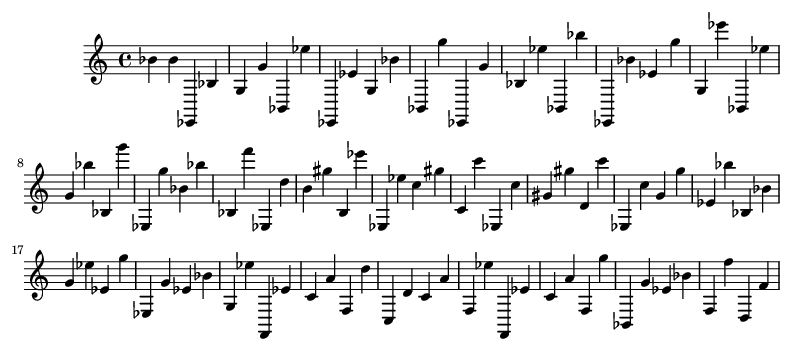

In [8]:
# First Lets write some functions that we need to look into the data
def show(music):
    display(Image(str(music.write("lily.png"))))
    
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else: 
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

Melody_Snippet = chords_n_notes(Corpus[:100])
show(Melody_Snippet)

### Ï†ÑÏ≤¥ CorpusÏóê Ï°¥Ïû¨ÌïòÎäî ÏùåÌëúÏùò Í∞úÏàòÎ•º ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.

[Ï∞∏Í≥†] `Counter` ÌÅ¥ÎûòÏä§Î•º Î™®Î•∏Îã§Î©¥?
https://docs.python.org/ko/3/library/collections.html#collections.Counter

Counter ÌÅ¥ÎûòÏä§Îäî ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Ïò® IterableÏóêÏÑú Í∞Å ÏõêÏÜåÍ∞Ä Î™á Î≤àÏî© ÎÇòÏò§ÎäîÏßÄÎ•º ÏïåÎ†§Ï£ºÎäî Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§. ÎîïÏÖîÎÑàÎ¶¨Ï≤òÎüº keyÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùÑ ÏùΩÏùÑ Ïàò ÏûàÍ≥†, ÌäπÏ†ï keyÍ∞Ä CounterÏóê Ï°¥Ïû¨ÌïòÎäîÏßÄÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏïÑÎûòÎäî ÏòàÏãúÏûÖÎãàÎã§.
``` Python
>>> Counter(["hi", "hey", "hi", "hi", "hello", "hey"])
Counter({'hi': 3, 'hey': 2, 'hello': 1})
```

In [9]:
# Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 317


## ÏùåÌëúÏùò Îì±Ïû• ÎπàÎèÑÎ•º ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.
ÌäπÏ†ï Î©úÎ°úÎîîÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÏùåÌëúÍ∞Ä ÏûàÏùÑ Í≤ÉÏù¥Í≥†, Ïñ¥Îñ§ ÏùåÌëúÏùò Í≤ΩÏö∞ÏóêÎäî ÏïÑÏ£º Í∞ÄÎÅîÏî©Îßå Îì±Ïû•Ìï† Í≤ÉÏûÖÎãàÎã§. RNN / LSTM Î™®Îç∏ÎßÅÏóêÏÑú ÎπàÎèÑÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÍ≤å Îì±Ïû•ÌïòÎäî Í≤ΩÏö∞ÏóêÎäî Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï©ÎãàÎã§. Îî∞ÎùºÏÑú Î∞úÏÉù ÎπàÎèÑÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù Ìï©ÏãúÎã§.

In [10]:
# Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())

# Average recurrence for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrence for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrence for a note in Corpus: 200.09148264984228
Most frequent note in Corpus appeared: 1869 times
Least frequent note in Corpus appeared: 1 time


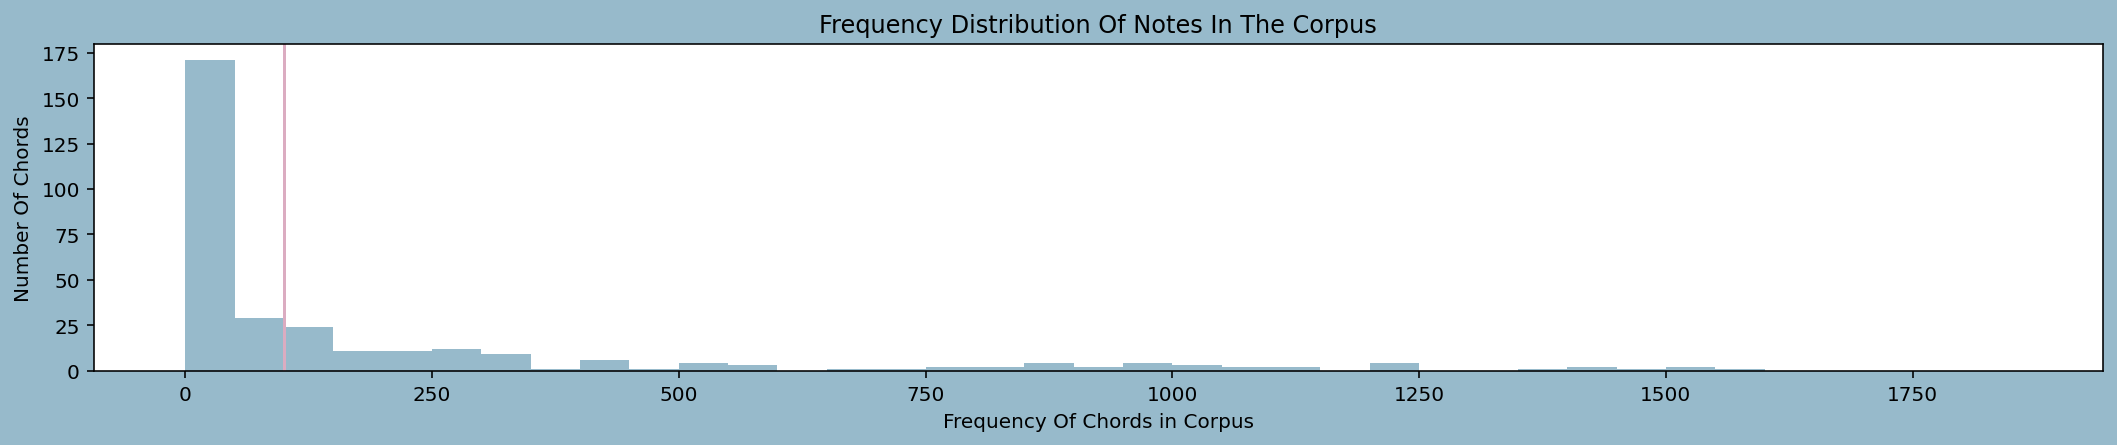

In [11]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

### 100Î≤à ÎØ∏ÎßåÏúºÎ°ú Îì±Ïû•Ìïú ÏùåÌëúÎì§ÏùÄ Ï†úÍ±∞
`count_num` Í∞ùÏ≤¥ÏóêÏÑú iterationÏùÑ ÌïòÎ©¥ÏÑú `key`, `value`Î•º ÎΩëÏïÑÎÉÖÎãàÎã§. `key`Îäî ÏùåÌëúÎ•º ÎÇòÌÉÄÎÇ¥Îäî stringÏù¥Í≥† `value`Îäî Ìï¥Îãπ ÏùåÌëúÍ∞Ä Îì±Ïû•Ìïú ÌöüÏàòÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Îì±Ïû• ÌöüÏàòÍ∞Ä 100Î≤à ÎØ∏ÎßåÏù¥Î©¥ `rare_note`ÎùºÎäî Î¶¨Ïä§Ìä∏Ïóê ÏßëÏñ¥ÎÑ£Ïñ¥ÏÑú ÎÇòÏ§ëÏóê Ï†úÍ±∞Ìï©ÎãàÎã§.

In [12]:
# Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 200


In [13]:
# Rare noteÏóê Ìï¥ÎãπÌïòÎäî ÏùåÌëúÎì§ÏùÑ Ï†úÍ±∞Ìï¥ Ï§çÎãàÎã§.
for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(Corpus))

Length of Corpus after elemination the rare notes: 59854


##  9. Data Prepreocessing
ÏùåÌëúÎì§ÏùÑ LSTMÏóê ÏßëÏñ¥ÎÑ£ÏúºÎ†§Î©¥ Î™®Îëê Ïù∏ÏΩîÎî©ÏùÑ Ìï¥Ï§òÏïº Ìï©ÎãàÎã§. NLPÏóêÏÑú Îã®Ïñ¥Î•º Í∞ÅÍ∞Å Î≤°ÌÑ∞Î°ú ÌëúÌòÑÌï¥Ï§Ä Í≤ÉÍ≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§. ÏàúÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

1. <b>Dictionary ÏÉùÏÑ±</b>: Ïö∞ÏÑ† Í∞ÅÍ∞ÅÏùò ÏùåÌëúÎ•º indexÎ°ú mappingÌï¥Ï£ºÎäî dictionaryÎ•º ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§. ÏùåÌëúÎäî stringÏúºÎ°ú ÌëúÌòÑÎêòÎØÄÎ°ú Í∞ÅÍ∞ÅÏùò stringÏùÑ indexÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
2. <b>Encodding and Splitting the corpus</b>: CorpusÎ•º 1Î≤àÏóêÏÑú ÎßåÎì† dictionaryÎ•º Ïù¥Ïö©ÌïòÏó¨ Ïù∏ÏΩîÎî© Ìï¥Ï£ºÍ≥†, Îã§ÏùåÏúºÎ°ú Ïù¥Î•º ÎèôÏùºÌïú Í∏∏Ïù¥Ïùò sequenceÎ°ú Ï™ºÍ∞úÏ£ºÏñ¥Ïïº Ìï©ÎãàÎã§.
3. <b>Assigning X and y</b>: LabelÏùÑ resizeÌïòÍ≥† normalize Ìï¥Ï£ºÍ≥†, targetÏùÄ one-hot encodingÏùÑ Ìï¥Ï§çÎãàÎã§.

* Reverse mappingÏùÑ Íµ≥Ïù¥ Îî∞Î°ú Ï†ïÏùòÌï¥Ï£ºÎäî Í≤ÉÏùÄ ÏãúÍ∞Ñ Î≥µÏû°ÎèÑ Í¥ÄÏ†êÏóêÏÑú ÏÉùÍ∞ÅÌïòÎ©¥ Îê©ÎãàÎã§. ÎßåÏïΩ Ïù¥Î•º Ï†ïÏùòÌïòÏßÄ ÏïäÎäîÎã§Î©¥ ÎîîÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú Îß§Î≤à loopÎ•º ÎèåÏïÑÏïº ÌïòÎØÄÎ°ú ÎπÑÌö®Ïú®Ï†ÅÏûÖÎãàÎã§.

### Dictionary ÏÉùÏÑ±

In [14]:
# Storing all the unique characters present in my corpus to bult a mapping dic.
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) # length of corpus
L_symb = len(symb) # length of total unique characters

# Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 59854
Number of unique characters: 228


## [Ï§ëÏöî!] Encodding and Splitting the Corpus
RNN Í∏∞Î∞òÏùò ÏïÑÌÇ§ÌÖçÏ≥êÎ•º ÏÇ¨Ïö©Ìï† Îïå Í∞ÄÏû• Ìó∑Í∞àÎ¶¨Îäî Î∂ÄÎ∂ÑÏûÖÎãàÎã§. RNNÏù¥ÎÇò LSTMÏùÄ input Îç∞Ïù¥ÌÑ∞Ïùò dimensionÏùÑ Ï†ïÌôïÌïòÍ≤å ÎßûÏ∂∞Ï£ºÏñ¥Ïïº ÌïòÎäîÎç∞, Ïù¥ Í≥ºÏ†ïÏù¥ Ï°∞Í∏à ÍπåÎã§Î°≠ÏäµÎãàÎã§. üòû Ï∞∏Í≥†Î°ú ÏïÑÎûò Ïù¥ÎØ∏ÏßÄÏôÄ Í∞ôÏù¥ Í≥†Ï†ïÎêú Í∏∏Ïù¥Ïùò sequenceÎ•º Í∞ÄÏßÄÍ≥† Îã§ÏùåÏóê ÎÇòÏò¨ Î∂ÄÎ∂ÑÏùÑ ÏòàÏ∏°ÌïòÍ≥†, Í∑∏ÎåÄÎ°ú Ìïú Ïπ∏ Ïù¥ÎèôÌï¥ÏÑú ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú trainingÏù¥ ÏßÑÌñâÎê©ÎãàÎã§. ÌùîÌûà ÎßêÌïòÎäî sliding window Î∞©ÏãùÏûÖÎãàÎã§.

Ï∞∏Í≥†: https://data-analysis-expertise.tistory.com/67

Keras LSTM documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

![image](https://www.researchgate.net/publication/350511416/figure/fig1/AS:1007244028174337@1617157098300/LSTM-sliding-window-prediction-principle.png)

Ïö∞ÏÑ†, RNNÏóê Îì§Ïñ¥Í∞ÄÎäî inputÏùÄ Î∞òÎìúÏãú (batch, timesteps, feature)ÏúºÎ°ú 3Í∞úÏùò Ï∞®ÏõêÏùÑ Í∞ÄÏ†∏Ïïº Ìï©ÎãàÎã§. 
- Batch: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.
- Timesteps: Input dataÏùò sequence Í∏∏Ïù¥Î•º ÎßêÌï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ 30ÏùºÎèôÏïàÏùò Ï£ºÍ∞ÄÎ•º Î∞îÌÉïÏúºÎ°ú Îã§Ïùå ÎÇ†Ïùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÍ≥† Ïã∂Îã§Í≥† ÌïòÎ©¥ sequence lengthÍ∞Ä 30Ïù¥ Îê† Í≤ÉÏûÖÎãàÎã§.
- Feature: Input (X)ÏóêÏÑú featureÏùò ÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú 1Ïù¥Í≥†, ÎßåÏïΩ Ï£ºÏãù Í∞ÄÍ≤© ÏòàÏ∏°ÏóêÏÑú open, high, low, close Í∞ÄÍ≤©ÏùÑ Î™®Îëê ÏÇ¨Ïö©Ìï¥ÏÑú closeÎ•º ÏòàÏ∏°ÌïòÍ≤†Îã§Î©¥ 4Í∞Ä Îê† Í≤ÉÏûÖÎãàÎã§.

ÏïÑÎûò Î™®Îç∏ÏóêÏÑúÎäî 40Í∞úÏùò ÏùåÌëúÎ•º Í∞ÄÏßÄÍ≥† Îã§Ïùå ÏùåÌëúÎ•º ÏòàÏ∏°ÌïòÎäî taskÎ•º ÏàòÌñâÌï† Í≤ÉÏûÖÎãàÎã§. Îî∞ÎùºÏÑú timestepsÎäî 40Ïù¥ Îê©ÎãàÎã§. Ïã§Ï†úÎ°ú Î¨∏Ï†úÎ•º ÌíÄÎã§Î≥¥Î©¥ timestepsÎßå Ïûò Ï†ïÌï¥Ï£ºÎ©¥ ÎÇòÎ®∏ÏßÄ Îëê Í∞úÏùò Ï∞®ÏõêÏùÄ ÏÉùÍ∞ÅÌï† ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§. ReshapeÎßå Ïûò Ìï¥ÏÑú Ï∞®ÏõêÏùÑ ÎßûÏ∂∞Ï£ºÎ©¥ Îê©ÎãàÎã§.


In [15]:
# Splitting the Corpus in equal length of strings and output target
# ÏïûÏÑú ÏÑ§Î™ÖÌïú sliding window Î∞©ÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï¥Ï£ºÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]  # iÎ≤àÏß∏Î∂ÄÌÑ∞ 40Í∞úÏùò ÏùåÌëú string
    target = Corpus[i + length]  # 40Í∞úÏùò ÏùåÌëú Î∞îÎ°ú Îã§ÏùåÏùò ÏùåÌëú string
    features.append([mapping[j] for j in feature])  # 40Í∞úÎ•º Î™®Îëê indexÎ°ú Î∞îÍæº Îí§ Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥ÏÑú append
    targets.append(mapping[target])  # ÏòàÏ∏° ÎåÄÏÉÅÏù∏ ÏùåÌëúÎèÑ indexÎ°ú Î∞îÍæº Îí§ append
    
    
L_datapoints = len(targets)  # Í≤∞Íµ≠ windowÎ•º Í≥ÑÏÜç ÏõÄÏßÅÏù¥Î©∞ Ï¥ù targetÍ∞úÏùò ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï¥Ïïº ÌïúÎã§.
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 59814


In [16]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1))) / float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets)

In [17]:
# Batch, timesteps, features
X.shape, y.shape

((59814, 40, 1), (59814, 228))

In [18]:
# Taking out a subset of data to be used as seed
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

## 10. LSTM layer Íµ¨ÏÑ±ÌïòÍ∏∞
kerasÏóêÏÑú `Sequential` Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìïú Îí§, Î™®Îç∏Ïóê layerÎ•º ÌïòÎÇòÏî© ÎÑòÍ≤®Ï£ºÎ©¥ ÏâΩÍ≤å Íµ¨ÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

Ï∞∏Í≥†: https://tykimos.github.io/2017/04/09/RNN_Getting_Started/
- LSTM: Ï∂úÎ†• Î≤°ÌÑ∞Ïùò Ï∞®Ïõê, input shapeÎ•º ÎÑòÍ≤®Ï£ºÎ©¥ Îê©ÎãàÎã§. Ïù¥Îïå `return_sequences`Îäî ÎßàÏßÄÎßâ sequenceÏóêÏÑú outputÏùÑ Ìïú Î≤àÎßå Ï∂úÎ†•Ìï†ÏßÄ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌï¥ Ï§çÎãàÎã§. LSTMÏùÑ Ïó¨Îü¨ Í∞ú ÏåìÍ±∞ÎÇò many to many Î¨∏Ï†úÎ•º ÌëºÎã§Î©¥ `True`Î°ú ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
- Dropout: Overfitting Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ inputÏóê dropoutÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§. DropoutÏùÄ training Í≥ºÏ†ïÏóêÏÑúÎßå ÏàòÌñâÌïòÍ≥† inference Í≥ºÏ†ïÏóêÏÑúÎäî Ìï¥Ï†úÌï¥Ï§òÏïº ÌïòÎäîÎç∞, Ïù¥ÌõÑÏóê `model.fit()` Ìï®ÏàòÏóêÏÑú ÏûêÎèôÏúºÎ°ú Ïù¥Î•º Ìï¥Í≤∞Ìï¥ Ï§çÎãàÎã§.
- Dense: Fully Connected (FC) layerÎ•º Íµ¨ÏÑ±Ìï©ÎãàÎã§. Ïù¥Ï†Ñ layerÏù∏ LSTM layerÏóêÏÑú Í∏∏Ïù¥Í∞Ä 256Ïù∏ Î≤°ÌÑ∞Î•º Î∞òÌôòÌïòÎØÄÎ°ú input shapeÎäî ÏûêÎèôÏúºÎ°ú 256Ïù¥ Îê©ÎãàÎã§. Îî∞ÎùºÏÑú output shapeÎßå 256ÏúºÎ°ú ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
- Adamax optimizer: Adam optimizerÏùò Î≥ÄÌòï Ï§ë ÌïòÎÇòÎ°ú, time-variantÌïú taskÏóêÏÑú Ï£ºÎ°ú ÏÇ¨Ïö©Îê©ÎãàÎã§.
- `model.compile`: TrainingÏùÑ ÌïòÍ∏∞Ïóê ÏïûÏÑúÏÑú lossÏôÄ optimizer Îì±ÏùÑ ÏßÄÏ†ïÌï¥Ï£ºÍ≥†, ÏïûÏÑú Íµ¨ÏÑ±Ìïú layerÎì§ÏùÑ Î™®Îëê Ìï©Ï≥êÏÑú Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≤å Îê©ÎãàÎã§.

In [19]:
#Initialising the Model
model = Sequential()  # KerasÏóêÏÑú layerÎ•º ÏÑ†ÌòïÏúºÎ°ú Ïó∞Í≤∞Ìï† Îïå ÏÇ¨Ïö©

# ÌïÑÏöîÌïú layerÎì§ÏùÑ ÌïòÎÇòÌïòÎÇò Ï∂îÍ∞ÄÌï¥ Ï§ÄÎã§
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
# Compiling the model for training
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [20]:
# Model's Summary               
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 512)           1052672   
                                                                 
 dropout (Dropout)           (None, 40, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 228)               58596     
                                                                 
Total params: 1,964,516
Trainable params: 1,964,516
Non-

## 11. Training

ÌòπÏãúÎùºÎèÑ Ï§ëÍ∞ÑÏóê OOM (Cuda out of memory) Ïò§Î•òÍ∞Ä ÎÇúÎã§Î©¥ Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌïòÍ≥† Îã§Ïãú ÎèåÎ¶¨ÏÖîÏïº Ìï©ÎãàÎã§. nvidia-smi Í≤∞Í≥ºÏóêÏÑú GPU Î©îÎ™®Î¶¨ Ï†êÏú†Ïú®ÏùÑ ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî.

In [21]:
# Training the Model
history = model.fit(X_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
187/187 [==============================] - 16s 45ms/step - loss: 4.5735
Epoch 2/200
187/187 [==============================] - 8s 45ms/step - loss: 4.4669
Epoch 3/200
187/187 [==============================] - 8s 42ms/step - loss: 4.4410
Epoch 4/200
187/187 [==============================] - 8s 42ms/step - loss: 4.4450
Epoch 5/200
187/187 [==============================] - 8s 43ms/step - loss: 4.4576
Epoch 6/200
187/187 [==============================] - 8s 43ms/step - loss: 4.4857
Epoch 7/200
187/187 [==============================] - 8s 43ms/step - loss: 4.4197
Epoch 8/200
187/187 [==============================] - 8s 44ms/step - loss: 4.3866
Epoch 9/200
187/187 [==============================] - 8s 44ms/step - loss: 4.3765
Epoch 10/200
187/187 [==============================] - 8s 45ms/step - loss: 4.3423
Epoch 11/200
187/187 [==============================] - 8s 45ms/step - loss: 4.3221
Epoch 12/200
187/187 [==============================] - 8s 44ms/step - loss: 4.3147


[Text(0.5, 0, 'Epochs')]

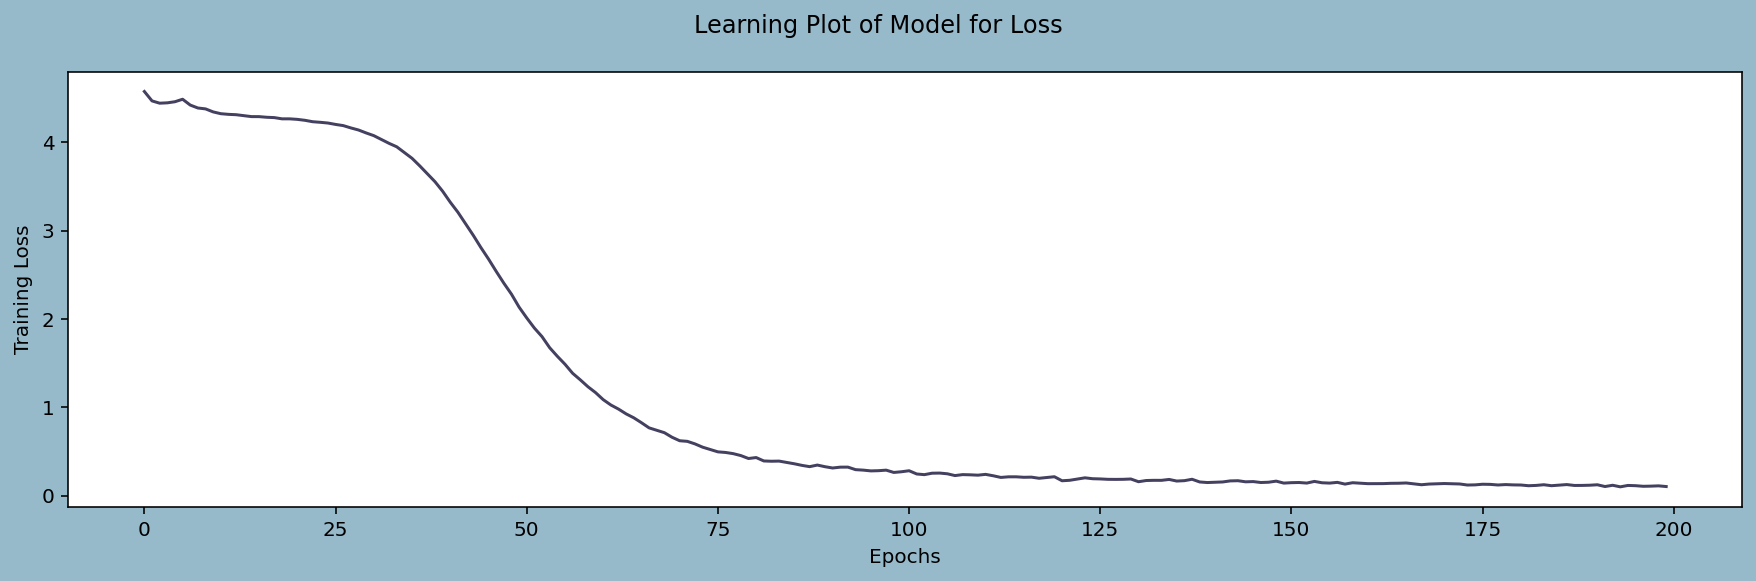

In [22]:
# Plotting the learnings 
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

## TrainingÏù¥ ÏôÑÎ£åÎêú Î™®Îç∏Î°ú Î©úÎ°úÎîî ÏÉùÏÑ±

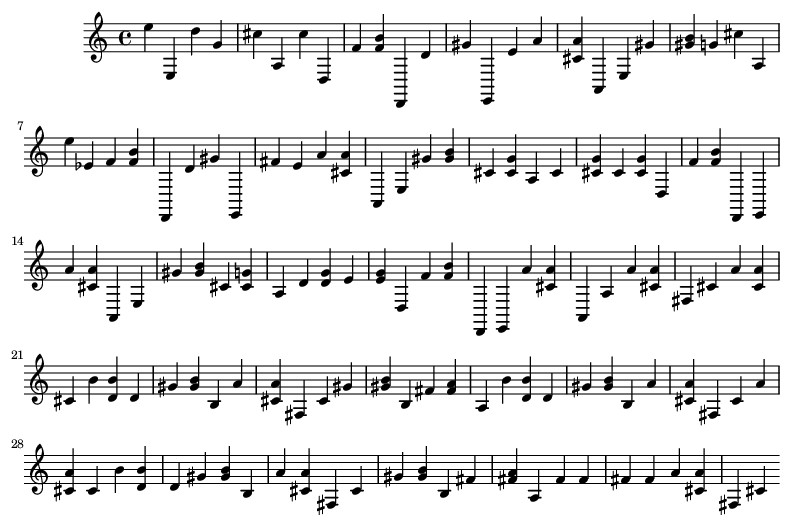

In [23]:
def Malody_Generator(Note_Count):
    seed = X_seed[np.random.randint(0,len(X_seed)-1)]
    Music = ""
    Notes_Generated=[]
    for i in range(Note_Count):
        seed = seed.reshape(1,length,1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0 # diversity
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index/ float(L_symb)   
        Notes_Generated.append(index)
        Music = [reverse_mapping[char] for char in Notes_Generated]
        seed = np.insert(seed[0],len(seed[0]),index_N)
        seed = seed[1:]
    # Now, we have music in form or a list of chords and notes and we want to be a midi file.
    Melody = chords_n_notes(Music)
    Melody_midi = stream.Stream(Melody)   
    return Music,Melody_midi


# Getting the Notes and Melody created by the model
Music_notes, Melody = Malody_Generator(100)
show(Melody)

In [25]:
# ÏÉùÏÑ±Îêú Î©úÎ°úÎîîÎ•º Ï†ÄÏû• (ÏûêÎèôÏúºÎ°ú Îã§Ïö¥Î°úÎìú ÎêòÎãà Î≥∏Ïù∏ Í∏∞Ïàò, Ïù¥Î¶ÑÎßå ÏßëÏñ¥ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§.)
from google.colab import files
file_name = 'melody_22Í∏∞_ÌôçÏÑ∏ÏïÑ.mid'
Melody.write('midi', file_name)

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Í≥ºÏ†ú 1: ÏÉùÏÑ±Îêú MIDI fileÏùÑ mp3 ÌååÏùºÎ°ú Î≥ÄÌôò ÌõÑ ÏóÖÎ°úÎìú
Îã§Ïùå ÎßÅÌÅ¨ÏóêÏÑú Î≥ÄÌôò ÌõÑ Ïù¥ ipynb ÌååÏùºÍ≥º Ìï®Íªò GithubÏóê ÏóÖÎ°úÎìú Ìï¥Ï£ºÏÑ∏Ïöî.
https://audio.online-convert.com/convert-to-mp3

## Í≥ºÏ†ú 2: RNN, LSTM Í¥ÄÎ†® Í∞ÑÎã®Ìïú Î¨∏Ï†ú

Î¨∏Ìï≠Ïù¥ ÏûàÎäî cellÏóê ÎãµÏùÑ Î∞îÎ°ú ÏûÖÎ†•Ìï¥ÏÑú Í∞ôÏù¥ Ï†úÏ∂úÌï¥ Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§. [ANSWER] ÌÜ†ÌÅ∞ÏùÑ ÏßÄÏö∞Í≥† ÎãµÏùÑ Ï†ÅÏúºÏãúÎ©¥ Îê©ÎãàÎã§. Î∞úÏ†ú ÏûêÎ£åÏóê ÏóÜÎäî ÎÇ¥Ïö©Ïù¥ ÏûàÎã§Î©¥ Íµ¨Í∏ÄÎßÅÏùÑ ÌÜµÌï¥ Ìï¥Í≤∞ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.


## Question 1 (True / False)
1. RNNÏóê hidden layerÎ•º Îçî ÎßéÏù¥ Ï∂îÍ∞ÄÌïòÎ©¥ vanishing gradient Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÎã§: [ANSWER] False

2. RNNÏóêÏÑú L2-regularizationÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥ vanishing gradient Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÎã§: [ANSWER] True

## Question 2 (Long answer)

[Ï∞∏Í≥†] Ïû•Î¨∏Ïùò ÎãµÎ≥ÄÏùÑ Ïì∏ ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§. ÌïµÏã¨Îßå Í∞ÑÎã®ÌïòÍ≤å ÏÑúÏà†ÌïòÏÖîÎèÑ Îê©ÎãàÎã§. 

1. RNNÍ≥º Í∏∞Ï°¥Ïùò MLP, CNN Î™®Îç∏Ïùò Ï∞®Ïù¥Ï†êÏùÑ ÏÑúÏà†ÌïòÏãúÏò§: </br> [ANSWER] Hidden StateÏôÄ Reccurrent RelationÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ïù¥Ï†Ñ ÏÉÅÌÉúÎ•º Í∏∞ÏñµÌïúÎã§

2. RNNÏóêÏÑú activation functionÏúºÎ°ú `tanh`Î•º ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Î•º ÏÑúÏà†ÌïòÏãúÏò§: </br> [ANSWER] Ïä§ÏºÄÏùº Ìè≠Î∞úÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÏù¥Îã§

2. RNNÏóêÏÑú hidden stateÍ∞Ä ÌïòÎäî Ïó≠Ìï†Ïù¥ Î¨¥ÏóáÏù∏Í∞ÄÏöî?: </br> [ANSWER] hidden state Îäî ÏßÅÏ†Ñ ÏÉÅÌÉúÏùò hidden stateÎ•º Î∞õÏïÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïúÎã§

3. RNNÏóêÏÑú ÏùºÏñ¥ÎÇòÎäî vanishing gradient Î¨∏Ï†úÍ∞Ä Î¨¥ÏóáÏù∏ÏßÄ, Í∑∏Î¶¨Í≥† Í∑∏ ÏõêÏù∏Ïù¥ Î¨¥ÏóáÏù∏ÏßÄ ÏÑ§Î™ÖÌïòÏãúÏò§: </br> [ANSWER] ÌôúÏÑ±Ìï®ÏàòÏù∏ ÌïòÏù¥ÌçºÎ≥ºÎ¶≠ ÌÉÑÏ††Ìä∏ Ìï®ÏàòÎ•º ÎØ∏Î∂ÑÌïòÍ≤å ÎêòÎ©¥ 1Î≥¥Îã§ ÏûëÏùÄ Í∞íÏù¥ ÎÇòÌÉÄÎÇòÍ≤å ÎêòÍ≥†, chain ruleÎ°ú ÎØ∏Î∂ÑÍ∞íÏùÑ Í≥±ÌïòÍ≤å ÎêòÎ©¥ back propagation Ïãú, 0Ïóê ÏàòÎ†¥ÌïòÍ≤å ÎêòÏñ¥ Í∏∞Ïö∏Í∏∞Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏ ÎêòÏßÄ ÏïäÎäî Î¨∏Ï†úÏù¥Îã§

4. (Open question) RNN Î™®Îç∏Îì§ÏùÄ ÏïûÏóêÏÑú Îì§Ïñ¥Ïò® ÎÇ¥Ïö©Îì§ÏùÑ Î≥¥Í≥† Îã§ÏùåÏùÑ ÏòàÏ∏°ÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÎèôÏûëÌï©ÎãàÎã§. Í∑∏Îü¨ÎÇò sequenceÏóêÏÑú ÏïûÎ∂ÄÎ∂ÑÎßåÏù¥ ÏïÑÎãàÎùº Îí∑Î∂ÄÎ∂ÑÏùò ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú outputÏùÑ ÎßåÎì§Ïñ¥ÎÇ¥Ïïº ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Ï≤òÎüº Îí∑Î∂ÄÎ∂Ñ ÎÇ¥Ïö©ÏùÑ Î∞òÏòÅÌïòÏó¨ sequenceÎ•º Ï≤òÎ¶¨ÌïòÎäî Î™®Îç∏Ïùò Íµ¨Ï°∞Î•º ÏÉùÍ∞ÅÌïòÍ≥† Í∞ÑÎã®ÌïòÍ≤å ÏÑ§Î™ÖÌï¥ Î≥¥ÏÑ∏Ïöî: </br> Hint: Bidirectional LSTM ÌÇ§ÏõåÎìúÎ°ú Íµ¨Í∏ÄÎßÅ</br>[ANSWER] ÏùºÎ∞òÏ†ÅÏù∏ LSTMÏùÄ ÏàúÎ∞©Ìñ•(ÏôºÏ™ΩÏóêÏÑú Ïò§Î•∏Ï™Ω)ÏúºÎ°ú Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÏßÄÎßå Ïó≠Î∞©Ìñ•ÏùòÏúºÎ°úÎèÑ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌï¥ÏÑú Ïù¥Ïö©Ìï† Ïàò ÏûàÎã§. Ïù¥Î•º ÏñëÎ∞©Ìñ• LSTMÏù¥ÎùºÍ≥† ÌïúÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏñëÎ∞©Ìñ• LSTMÏùÑ ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Îçî ÎßéÏùÄ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÍ≤å ÎÇòÌÉÄÎÇúÎã§. 



# Submission format
1. RNN_22Í∏∞_XXX.ipynb (Í≥ºÏ†ú 2, 3Ïóê ÎåÄÌïú ÎãµÎèÑ Í∞ôÏù¥ Ìè¨Ìï®)
2. melody_22Í∏∞_XXX.mp3

## Question 3 (Optional)
## PytorchÎ°ú RNN Íµ¨ÌòÑÌï¥Î≥¥Í∏∞

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

## 1. RNN Íµ¨ÌòÑ
PytorchÎ°ú neural network Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï† ÎïåÏóêÎäî `nn.Module`ÏùÑ ÏÉÅÏÜçÎ∞õÏïÑÏÑú Íµ¨ÌòÑÌïòÍ≤å Îê©ÎãàÎã§. 

### [Ï∞∏Í≥†] Í∞ùÏ≤¥ÏßÄÌñ• Í∞úÎÖêÏùÑ Ïûò Î™®Î•∏Îã§Î©¥?
Í∞ùÏ≤¥ÏßÄÌñ• Í∞úÎÖêÏùÑ Ïûò Î™®Î•¥Ïã†Îã§Î©¥ <b>ÏÉÅÏÜç</b>Ïù¥ÎûÄ ÏÉÅÏÜçÏùÑ Î∞õÏùÄ ÌÅ¥ÎûòÏä§ (Ïó¨Í∏∞ÏÑúÎäî CustomRNN)Í∞Ä Î∂ÄÎ™® ÌÅ¥ÎûòÏä§ (`nn.Module`)Ïùò Î©§Î≤Ñ Î≥ÄÏàòÏôÄ Î©îÏÜåÎìúÎ•º Í∑∏ÎåÄÎ°ú ÎÑòÍ≤®Î∞õÏïÑ ÌïÑÏöîÏóê ÎßûÍ≤å Ïû¨Ï†ïÏùòÌïòÍ±∞ÎÇò Í∏∞ÌÉÄ ÌïÑÏöîÌïú Í∏∞Îä•Îì§ÏùÑ Ï∂îÍ∞ÄÌï¥ÏÑú ÏÇ¨Ïö©ÌïòÎäî ÌñâÏúÑÎ°ú ÏâΩÍ≤å Ïù¥Ìï¥ÌïòÏãúÎ©¥ Îê©ÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥ ÏΩîÎìúÏùò Ï§ëÎ≥µÎèÑÎ•º ÎÇÆÏ∂îÍ≥† Î≥¥Îã§ Ìö®Ïú®Ï†ÅÏù∏ ÏÑ§Í≥ÑÎ•º Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

ÏòàÎ•º Îì§Ïñ¥ÏÑú `nn.Module` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏïÑ ÎßåÎì† Î™®Îì† ÌÅ¥ÎûòÏä§Îì§ÏùÄ `__init()__` ÏÉùÏÑ±ÏûêÏôÄ `forward()` Î©îÏÜåÎìúÎ•º Íµ¨ÌòÑÌï®ÏúºÎ°úÏç® Î™®Îì† neural networkÍ∞Ä high levelÏóêÏÑúÎäî ÎèôÏùºÌïú ÎèôÏûëÏùÑ Ìï®ÏùÑ Î≥¥Ïû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÎßåÏïΩ ÏÉÅÏÜç Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäîÎã§Î©¥ Î™®Îç∏ÏùÑ trainingÌïòÎäî ÏΩîÎìú, inferenceÎ•º ÌïòÎäî ÏΩîÎìú Îì±ÏùÑ neural network Ï¢ÖÎ•òÎßàÎã§ ÏÉàÎ°ú ÏßúÏïº ÌïòÎØÄÎ°ú Î≥µÏû°Ìï¥ÏßëÎãàÎã§.

### Íµ¨ÌòÑ Í¥ÄÎ†® Î∞∞Í≤ΩÏßÄÏãù
`nn.Module` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏúºÎ©¥ `__init__()` ÏÉùÏÑ±ÏûêÏôÄ `forward()` Î©îÏÜåÎìúÎ•º Íµ¨ÌòÑÌï¥Ïïº Ìï©ÎãàÎã§. ÏÉùÏÑ±ÏûêÏóêÏÑúÎäî Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† Í∏∞Î≥∏Ï†ÅÏù∏ Î©§Î≤Ñ Î≥ÄÏàòÎì§ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÍ≤å Îê©ÎãàÎã§. Ïó¨Í∏∞ÏÑú Î©§Î≤Ñ Î≥ÄÏàòÎ°úÎäî ÌÅ¨Í≤å Îëê Í∞ÄÏßÄÍ∞Ä ÏûàÏäµÎãàÎã§.
1. Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≥êÏôÄ Í¥ÄÎ†®Îêú dimensionÎì§ (Í∞ÅÍ∞ÅÏùò ÏùòÎØ∏Îäî Î∞úÏ†ú PPT Ï∞∏Í≥†)
 - Input vectorÏùò Í∏∏Ïù¥
 - Hidden layerÏùò Í∏∏Ïù¥
 - Output vectorÏùò Í∏∏Ïù¥
 - Batch size


2. Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Îê† layerÎì§
 - PytorchÏùò `nn` moduleÏóêÏÑúÎäî neural networkÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Îã§ÏñëÌïú layerÎ•º ÎØ∏Î¶¨ Íµ¨ÌòÑÌï¥ ÎëêÏóàÏäµÎãàÎã§. Convolution layer, pooling layer, linear layer Îì±Ïù¥ Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥ÏÑú Î≥µÏû°Ìïú Ïó∞ÏÇ∞ÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑÌï† ÌïÑÏöîÍ∞Ä ÏóÜÏäµÎãàÎã§. Î≥∏ Í≥ºÏ†úÏóêÏÑúÎäî Ìï¥Îãπ layerÎ•º ÏåìÏïÑÏÑú RNNÏùÑ Íµ¨ÌòÑÌïúÎã§Í≥† Î≥¥ÏãúÎ©¥ Îê©ÎãàÎã§.
 - Î≥∏ Í≥ºÏ†úÏóêÏÑúÎäî Linear layerÎßå ÌôúÏö©ÌïòÎ©¥ Îê©ÎãàÎã§. Ïù¥Îäî MLP ÏÑ∏ÏÖòÏóêÏÑú Î∞∞Ïö¥ fully connected layerÏôÄ Í∞ôÏäµÎãàÎã§. FC layerÏù¥ÎØÄÎ°ú input, outputÏùò sizeÏôÄ bias ÏÇ¨Ïö© Ïú†Î¨¥Îßå Ï†ïÏùòÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§. https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear


ÏÉùÏÑ±ÏûêÎ•º Ï†ïÏùòÌñàÏúºÎ©¥ `forward()` Ìï®ÏàòÎ•º Ï†ïÏùòÌï† Ï∞®Î°ÄÏûÖÎãàÎã§. `forward()` Î©îÏÜåÎìúÍ∞Ä Î™®Îç∏ Íµ¨ÌòÑÏóêÏÑú ÌïµÏã¨ÏûÖÎãàÎã§. Ïù¥ Î©îÏÜåÎìúÎäî Î™®Îç∏Ïóê input dataÎ•º ÏßëÏñ¥ÎÑ£ÏúºÎ©¥ ÏûêÎèôÏúºÎ°ú Ìò∏Ï∂úÎêòÍ≥† argumentÎ°ú inputÏù¥ Ï†ÑÎã¨Îê©ÎãàÎã§. ÏïûÏÑú Ï†ïÏùòÌïú layerÎì§ÏùÑ Ïûò Ìò∏Ï∂úÌï¥ÏÑú Î©îÏÜåÎìúÎ•º Íµ¨ÌòÑÌïòÏãúÎ©¥ Îê©ÎãàÎã§.


*Backward passÎäî Î™®Îç∏ trainÏùÑ Ìï† Îïå `backward()`Í∞Ä ÏïåÏïÑÏÑú Ìï¥Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê `forward()`Îßå Ï†ïÏùòÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

In [ ]:
# nn.ModuleÏùÑ ÏÉÅÏÜçÎ∞õÏïÑÏÑú CustomRNN class Ï†ïÏùò

class CustomRNN(nn.Module):
    """
    RNN basic block
    """
    def __init__(self, input_size, hidden_size, output_size):
        """
        input_size: Input vector Í∏∏Ïù¥
        hidden_size: Hidden state vector Í∏∏Ïù¥
        output_size: Output vector Í∏∏Ïù¥
        """
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.W_xh = nn.Linear(input_size, hidden_size, bias=False)
        ##################################################################
        # TODO: ÌïÑÏöîÌïú Î©§Î≤Ñ Î≥ÄÏàò 2Í∞úÎ•º Ï∂îÍ∞ÄÎ°ú Ï†ïÏùòÌïòÏÑ∏Ïöî.
        #
        # 1. W_hh: hidden layer vectorÏóê Í≥±Ìï¥ÏßÄÎäî weight
        # 2. W_hy: hidden layerÎ°ú outputÏùÑ ÏÉùÏÑ±Ìï† Îïå Í≥±Ìï¥ÏßÄÎäî weight
        #
        # Hint: ÏúÑÏùò self.W_xh ÏΩîÎìúÎ•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.
        #
        ##################################################################
        # ÏïÑÎûò Ï£ºÏÑù Ìï¥Ï†ú ÌõÑ Ï†ïÏùòÌïòÏãúÎ©¥ Îê©ÎãàÎã§. biasÎäî Îëò Îã§ TrueÎ°ú Ìï¥Ï£ºÏÑ∏Ïöî.
        # self.W_hh = 
        # self.W_hy = 
        ##################################################################
        #                         END OF YOUR CODE                       #
        ##################################################################
        
    def forward(self, x, hidden_state):
        W_xh_x = self.W_xh(x)  # W_xh weightÏóê input xÎ•º Í≥±Ìï¥Ï§Ä Í≤∞Í≥º
        ##################################################################
        # TODO: Forward passÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏΩîÎìúÎ•º Ï∂îÍ∞ÄÌïòÏÑ∏Ïöî.
        #
        ########################### Ï†ÑÏ≤¥ Í≥ºÏ†ï ##############################
        #
        # 1. W_xhÏôÄ inputÏùÑ Í≥±ÌïúÎã§.
        # 2. W_hhÏôÄ {t - 1} ÏãúÏ†êÏóêÏÑúÏùò hidden state vectorÎ•º Í≥±ÌïúÎã§.
        # 3. ÎëòÏù¥ ÎçîÌïúÎã§.
        # 4. tanhÎ•º ÌÜµÍ≥ºÏãúÏºúÏÑú ÏÉàÎ°úÏö¥ hidden stateÎ•º ÎßåÎì§Ïñ¥ÎÇ∏Îã§.
        # 5. W_hyÏôÄ ÏÉàÎ°úÏö¥ hidden stateÎ•º Í≥±Ìï¥ÏÑú outputÏùÑ ÎßåÎì§Ïñ¥ÎÇ∏Îã§.
        # 6. outputÍ≥º ÏÉàÎ°úÏö¥ hidden stateÎ•º returnÌïúÎã§.
        #
        # Hint: torch.tanh
        #
        ##################################################################
        # ÏïÑÎûò Ï£ºÏÑù Ìï¥Ï†ú ÌõÑ Ï∂îÍ∞ÄÌïòÏãúÎ©¥ Îê©ÎãàÎã§.
        # W_hh_x = 
        # hidden_state = 
        # output = 
        ##################################################################
        #                         END OF YOUR CODE                       #
        ##################################################################
        # ÏïÑÎûò Ï£ºÏÑùÎèÑ Ìï¥Ï†úÌïòÏÑ∏Ïöî.
        # return output, hidden_state

## 2. ÏïÑÎûò ÏΩîÎìúÏóêÏÑú CorrectÍ∞Ä ÎÇòÏò§Î©¥ ÏôÑÎ£åÏûÖÎãàÎã§.

In [ ]:
model = CustomRNN(5, 6, 7)
model_str = str(model).splitlines()
import numpy
stack = []
for i in range(1, 4):
    stack.append(int(model_str[i][29]))
    stack.append(int(model_str[i][45]))

prod = numpy.prod(stack)

if prod == 45360:
    print("Correct!!!")
else:
    print("Incorrect...")